In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from math import factorial
# Function to calculate Combination
def comb(n, r):
    return factorial(n) / (factorial(r) * factorial(n-r))

In [3]:
# Function to Calculate Probabiliy of Acceptance Using Hypergeometric function for finite lot size
def hypergeometric(c, n, N, data):
    prob = []
    for i in data.index:
        h = []
        p = data[i]
        for j in range(c+1):
            M = int(N*p) 
            if M == 0:
                value = (comb((N-M), (n-j)) ) // comb(N, n)
                h.append(value)
            elif N-M >= n-j and M >= j:
                value = (comb(M, j) * comb((N-M), (n-j)) ) / comb(N, n)
                h.append(value)
            else:
                h.append(0)
        prob.append(np.round(np.sum(h), 5))
    return prob


In [4]:
# Function to Calculate Probabiliy of Acceptance Using Hypergeometric function for finite lot size
def infinite_size(c, n, data):
    prob = []
    for i in data.index:
        p = data[i]
        h = []
        for x in range(c+1):
            value = comb(n, x) * (p**x) * (1-p)**(n-x)
            h.append(value)
        prob.append(np.round(np.sum(h), 5))
    return prob
        

In [5]:
# Function to Plot the OC curves
def show(X, Y, color, axis=[0, 1, 0, 1]):
    plt.figure(figsize=(6, 5))
    plt.plot(X, Y, marker='o', color=color)
    plt.xlabel('Lot Proportion Defective')
    plt.ylabel('Probability of acceptance')
    plt.axis(axis)
    plt.grid()
    plt.show()
    

##### Example I (Lot size is finite)

In [6]:
c = 3 # Acceptance Number
n = 50 # Sample size
N = 500 # Lot size 

df1 = pd.DataFrame()
df1["p"] = np.arange(0.0, 1.01, 0.01)
df1['Prob_of_acceptance'] = hypergeometric(c, n, N, df1["p"])
df1.head()

,p,Prob_of_acceptance
0,0.00,1.00000
1,0.01,0.99959
2,0.02,0.98814
3,0.03,0.94723
4,0.04,0.87112


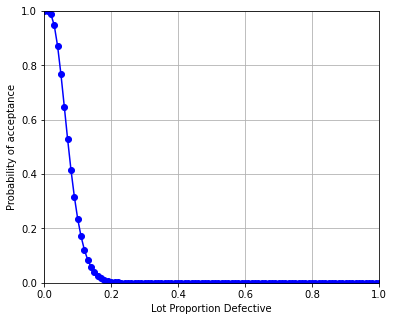

In [7]:
show(df1['p'], df1['Prob_of_acceptance'], 'blue')

* We can see that for p greater than 0.2, Probability of acceptance is almost 0

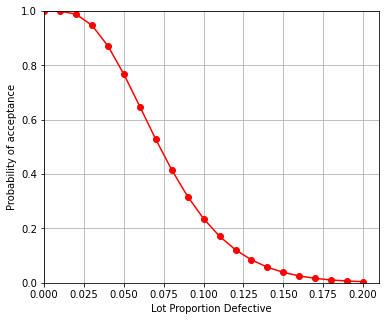

In [8]:
df1_ = df1[df1['p']<=0.20]
show(df1_['p'],df1_['Prob_of_acceptance'] ,'red', axis=[0, 0.21, 0, 1])

##### Example II (OC Curves for Various Acceptance Numbers)

In [9]:
# Lot Size (N) : 500
# Sample Size (n) : 50
# Acceptance Number (c) : 0 1 2 3 4 5
# Proportion Defective Range : 0 to 0.3 by 0.002

In [10]:
df2 = pd.DataFrame()
df2["p"] = np.arange(0.0, 0.3, 0.002)
df2['Prob_of_acceptance_0'] = hypergeometric(c=0, n=50, N=500, data=df2["p"])
df2['Prob_of_acceptance_1'] = hypergeometric(1, n, N, df2["p"])
df2['Prob_of_acceptance_2'] = hypergeometric(2, n, N, df2["p"])
df2['Prob_of_acceptance_3'] = hypergeometric(3, n, N, df2["p"])
df2['Prob_of_acceptance_4'] = hypergeometric(4, n, N, df2["p"])
df2['Prob_of_acceptance_5'] = hypergeometric(5, n, N, df2["p"])
df2.head()

,p,Prob_of_acceptance_0,Prob_of_acceptance_1,Prob_of_acceptance_2,Prob_of_acceptance_3,Prob_of_acceptance_4,Prob_of_acceptance_5
0,0.000,1.00000,1.00000,1.00000,1.00000,1.0,1.0
1,0.002,0.90000,1.00000,1.00000,1.00000,1.0,1.0
2,0.004,0.80982,0.99018,1.00000,1.00000,1.0,1.0
3,0.006,0.72851,0.97243,0.99905,1.00000,1.0,1.0
4,0.008,0.65522,0.94839,0.99648,0.99991,1.0,1.0


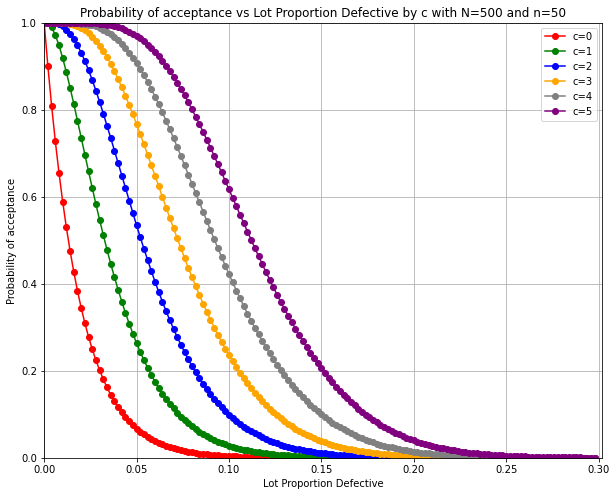

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(df2['p'], df2['Prob_of_acceptance_0'], marker='o', color='red')
plt.plot(df2['p'], df2['Prob_of_acceptance_1'], marker='o', color='green')
plt.plot(df2['p'], df2['Prob_of_acceptance_2'], marker='o', color='blue')
plt.plot(df2['p'], df2['Prob_of_acceptance_3'], marker='o', color='orange')
plt.plot(df2['p'], df2['Prob_of_acceptance_4'], marker='o', color='gray')
plt.plot(df2['p'], df2['Prob_of_acceptance_5'], marker='o', color='purple')
plt.title('Probability of acceptance vs Lot Proportion Defective by c with N=500 and n=50')
plt.xlabel('Lot Proportion Defective')
plt.ylabel('Probability of acceptance')

plt.axis([0, 0.302, 0, 1])
plt.legend(['c=0', 'c=1', 'c=2', 'c=3', 'c=4', 'c=5'])
plt.grid()
plt.show()

##### Example III (Validation using Kenett and Zacks ( 2014))

In [12]:
# Lot Size (N) : Infinite
# Sample Size (n) : 50
# Acceptance Number (c) : 1
# Proportion Defective Range : 0 to 0.18 by 0.001

In [13]:
df3 = pd.DataFrame()
df3["p"] = np.arange(0.0, 0.181, 0.001)
df3['Prob_of_acceptance'] = infinite_size(c=1, n=50, data=df3['p'])
df3.head()

,p,Prob_of_acceptance
0,0.000,1.00000
1,0.001,0.99881
2,0.002,0.99540
3,0.003,0.98998
4,0.004,0.98274


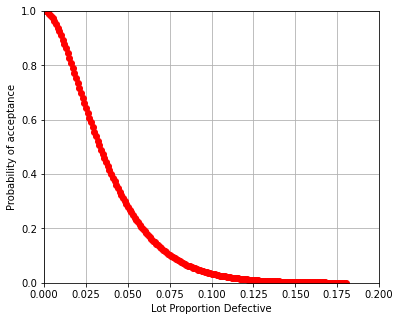

In [14]:
show(df3['p'], df3['Prob_of_acceptance'], 'red', axis=[0, 0.2, 0, 1])

##### Example IV (Validation using Montgomery (2013))

In [15]:
# Lot Size (N) : Infinite
# Sample Size (n) : 89
# Acceptance Number (c) : 0 1 2
# Proportion Defective Range : 0 to 0.08 by 0.001

In [16]:
df4 = pd.DataFrame()
df4["p"] = np.arange(0.0, 0.081, 0.001)
df4['Prob_of_acceptance_0'] = infinite_size(c=0, n=89, data=df4['p'])
df4['Prob_of_acceptance_1'] = infinite_size(c=1, n=89, data=df4['p'])
df4['Prob_of_acceptance_2'] = infinite_size(c=2, n=89, data=df4['p'])
df4.head()

,p,Prob_of_acceptance_0,Prob_of_acceptance_1,Prob_of_acceptance_2
0,0.000,1.00000,1.00000,1.00000
1,0.001,0.91480,0.99630,0.99989
2,0.002,0.83679,0.98604,0.99920
3,0.003,0.76537,0.97033,0.99747
4,0.004,0.69997,0.95016,0.99437


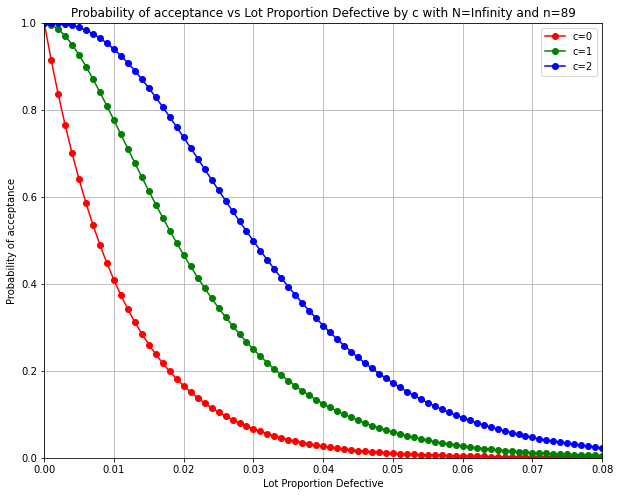

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(df4['p'], df4['Prob_of_acceptance_0'], marker='o', color='red')
plt.plot(df4['p'], df4['Prob_of_acceptance_1'], marker='o', color='green')
plt.plot(df4['p'], df4['Prob_of_acceptance_2'], marker='o', color='blue')
plt.title('Probability of acceptance vs Lot Proportion Defective by c with N=Infinity and n=89')

plt.axis([0, 0.080, 0, 1])

plt.xlabel('Lot Proportion Defective')
plt.ylabel('Probability of acceptance')
plt.legend(['c=0', 'c=1', 'c=2'])
plt.grid()
plt.show()